**IMPORT RELEVENT LIBRARIES**

IMPORT RELEVENT LIBRARIES

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT THE GOOGLE DRIVE**

Mounnt the google drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CHANGE THE CURRENT WORKING DIRECTORY**

Change the current working directory

In [23]:
os.chdir("/content/drive/My Drive/Deep Learning/")
os.getcwd()

'/content/drive/My Drive/Deep Learning'

**LOAD AND DISPLAY A IMAGE FROM A SPECIFIED PATH**

Load and display a image from a specified path

In [24]:
#Specify the path to the image and load the image using load_img from Keras
img = image.load_img("Letters/Pa/1.jpeg")

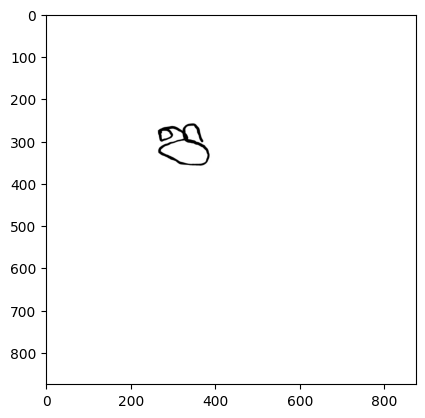

In [25]:
#Display the image using matplotlib
plt.imshow(img)

In [19]:
# Read the image using OpenCV (cv2) and retrieve its shape
cv2.imread("Pa/1.jpeg").shape

(875, 875, 3)

In [21]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)
# Create an ImageDataGenerator for validation data with pixel value rescaling
validation = ImageDataGenerator(rescale = 1/255)

**CREATE TRAINING AND VALIDATION DATASETS USING ImageDataGenerator**

In [48]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Letters/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
# Create a validation dataset generator using the validation ImageDataGenerator
validation_dataset = validation.flow_from_directory('Validation/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [49]:
# Retrieve the mapping of class names to their indices in the training dataset
train_dataset.class_indices

{'Pa': 0, 'U': 1}

In [50]:
# Retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**SPECIFYING THE CNN ARCHITECTURE**

In [51]:
# Create a Sequential model
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [52]:
# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**TRAINING THE MODEL**

In [54]:
# Train the model using the training dataset and validate on the validation dataset
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 5s 1s/step - loss: 0.7322 - accuracy: 0.6667 - val_loss: 1.6185 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 4s 892ms/step - loss: 0.7626 - accuracy: 0.6000 - val_loss: 0.7321 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.7560 - accuracy: 0.5000 - val_loss: 0.7421 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 5s 1s/step - loss: 0.8956 - accuracy: 0.5333 - val_loss: 0.6620 - val_accuracy: 0.5250
Epoch 5/30
5/5 [==============================] - 5s 1s/step - loss: 0.7557 - accuracy: 0.4000 - val_loss: 0.6571 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.9105 - accuracy: 0.7143 - val_loss: 1.5299 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.7902 - accuracy: 0.7333 - val_loss: 0.5801 - val_accuracy: 0.5500
Epoch 8/30
5/5 [======================

In [55]:
# Retrieve the mapping of class names to their indices in the validation dataset
validation_dataset.class_indices

{'Pa': 0, 'U': 1}

**TESTING SAMPLE DATA**

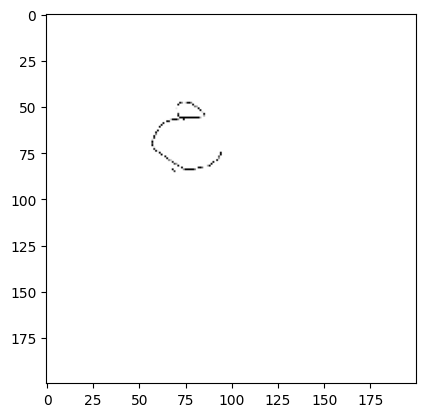

1/1 [==============================] - 0s 98ms/step
This is Letter 'U' in Sinhala


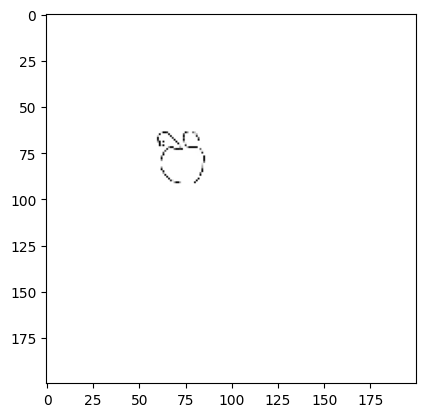

1/1 [==============================] - 0s 36ms/step
This is Letter 'Pa' in Sinhala


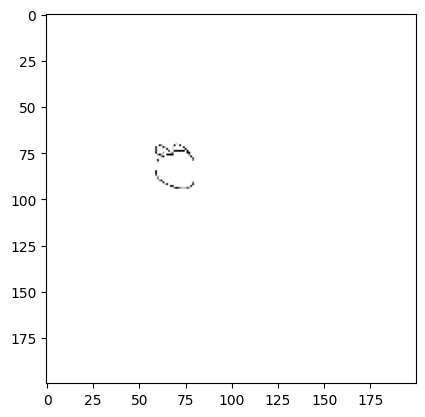

1/1 [==============================] - 0s 35ms/step
This is Letter 'Pa' in Sinhala


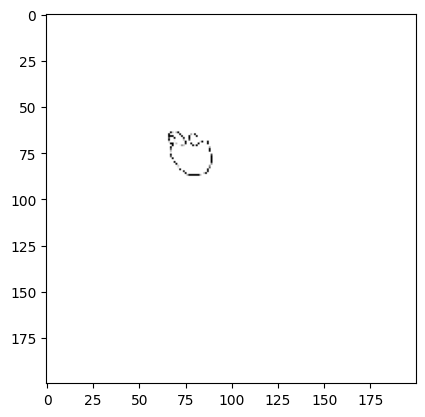

1/1 [==============================] - 0s 37ms/step
This is Letter 'Pa' in Sinhala


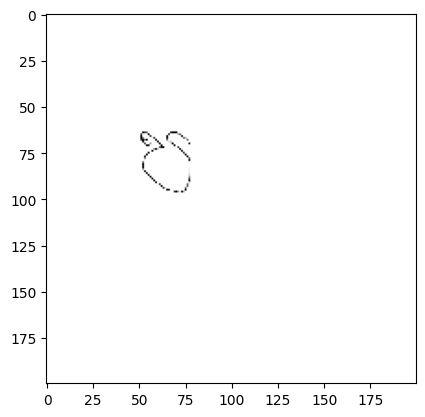

1/1 [==============================] - 0s 35ms/step
This is Letter 'Pa' in Sinhala


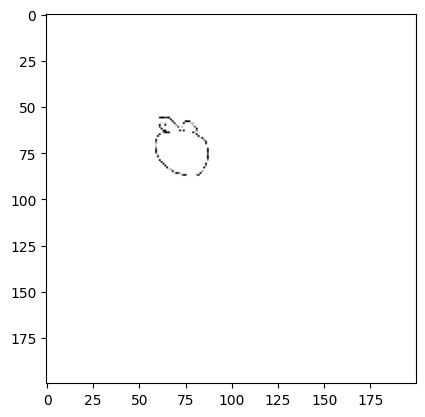

1/1 [==============================] - 0s 36ms/step
This is Letter 'Pa' in Sinhala


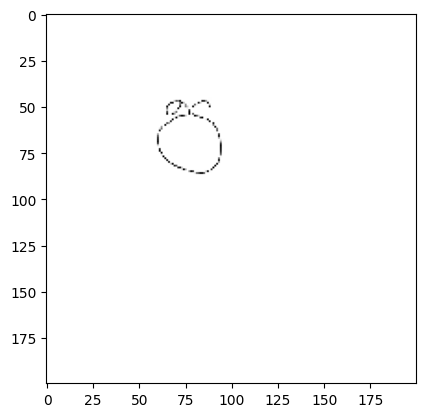

1/1 [==============================] - 0s 37ms/step
This is Letter 'Pa' in Sinhala


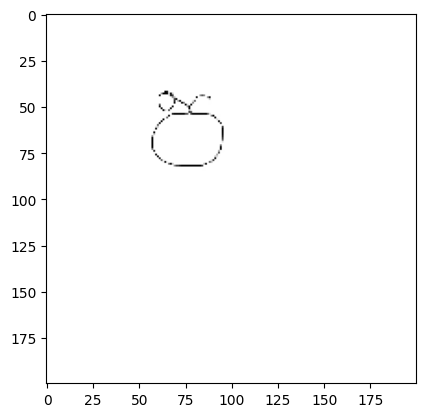

1/1 [==============================] - 0s 42ms/step
This is Letter 'Pa' in Sinhala


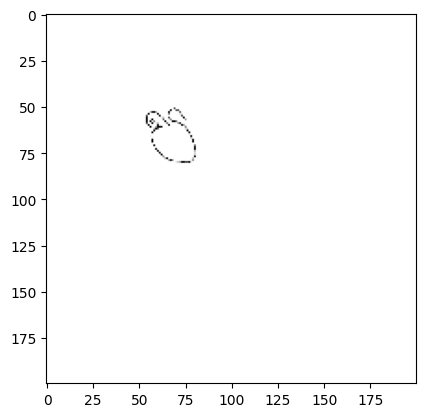

1/1 [==============================] - 0s 38ms/step
This is Letter 'Pa' in Sinhala


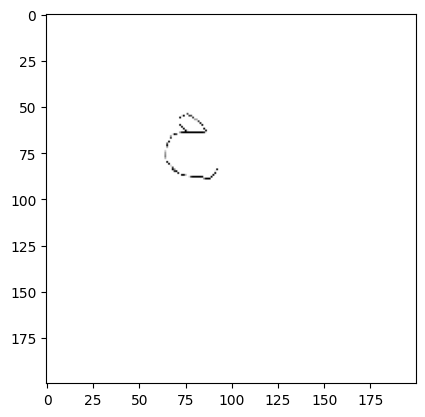

1/1 [==============================] - 0s 40ms/step
This is Letter 'U' in Sinhala


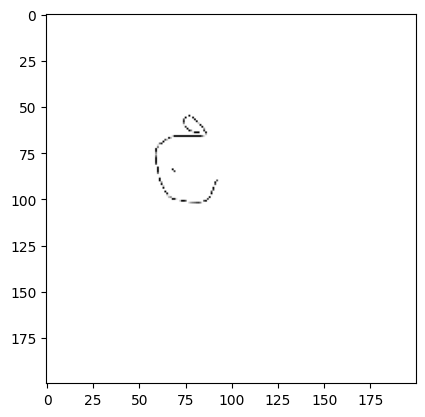

1/1 [==============================] - 0s 36ms/step
This is Letter 'U' in Sinhala


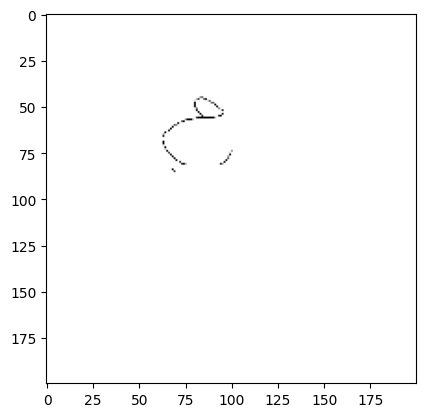

1/1 [==============================] - 0s 36ms/step
This is Letter 'U' in Sinhala


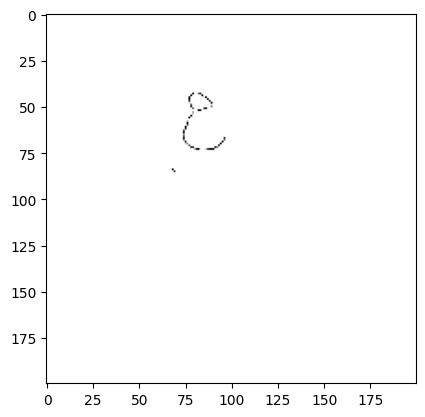

1/1 [==============================] - 0s 36ms/step
This is Letter 'U' in Sinhala


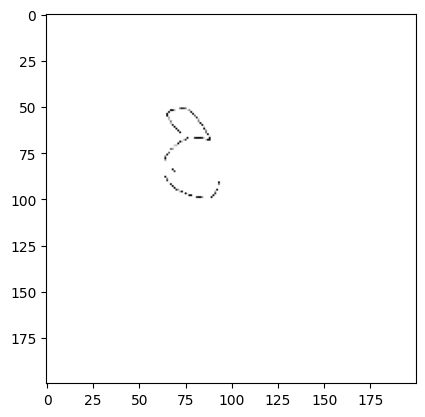

1/1 [==============================] - 0s 36ms/step
This is Letter 'U' in Sinhala


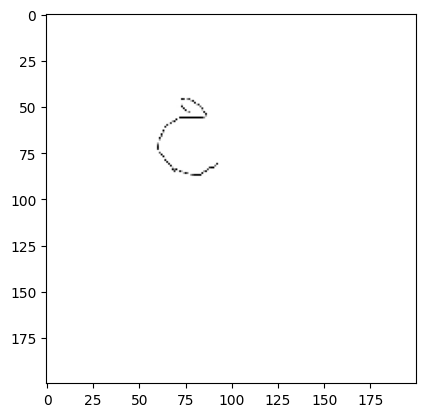

1/1 [==============================] - 0s 36ms/step
This is Letter 'U' in Sinhala


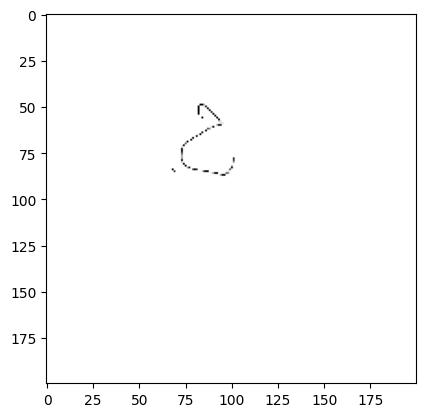

1/1 [==============================] - 0s 35ms/step
This is Letter 'U' in Sinhala


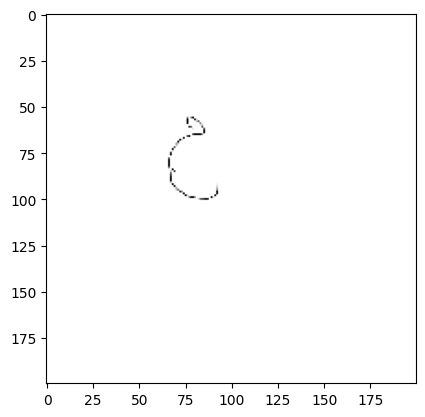

1/1 [==============================] - 0s 35ms/step
This is Letter 'U' in Sinhala


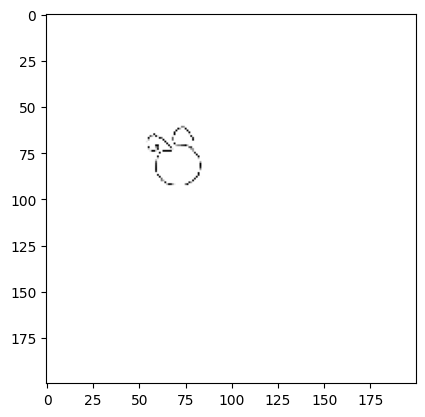

1/1 [==============================] - 0s 35ms/step
This is Letter 'Pa' in Sinhala


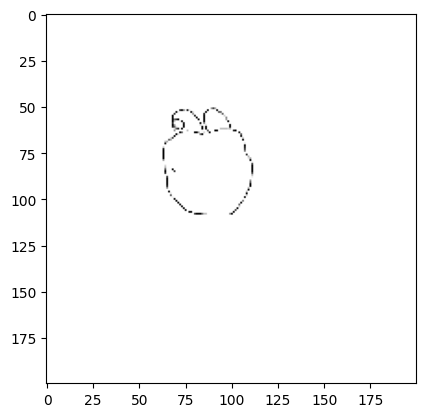

1/1 [==============================] - 0s 56ms/step
This is Letter 'U' in Sinhala


In [56]:
# Directory path containing the testing images
dir_path = 'Test/'

# Loop over each file in the directory
for i in os.listdir(dir_path):
  # Load the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

# Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is Letter 'Pa' in Sinhala")
  else:
    print("This is Letter 'U' in Sinhala")